In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('./data/track1/features/x_train_normal.csv')
x_valid = pd.read_csv('./data/track1/features/x_valid_normal.csv')
x_test = pd.read_csv('./data/track1/features/x_test_normal.csv')
y_train = pd.read_csv('./data/track1/features/y_train_normal.csv')
y_valid = pd.read_csv('./data/track1/features/y_valid_normal.csv')
y_test = pd.read_csv('./data/track1/features/y_test_normal.csv')

In [3]:
x_train_features = x_train.drop(columns=['날짜', 'CODE'], inplace=False)
y = y_train['Y'] <-2.0

### 1. Feature Filtering 
calculate mutual information of features with risk

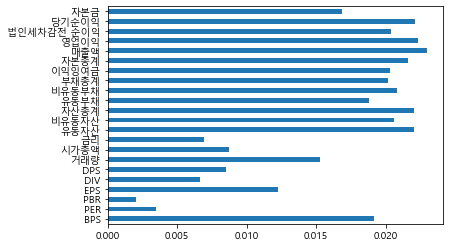

In [4]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train_features, y, discrete_features=False)
mutual_info_series = pd.Series(mutual_info, x_train_features.columns)

plt.rc('font', family='Malgun Gothic')
mutual_info_series.plot(kind='barh')
plt.show()

### 2. Backward Feture Selection

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rfecv = RFECV(estimator=RandomForestClassifier(), step = 1)
results = rfecv.fit_transform(x_train_features, y)


In [ ]:
print("size of optimal feature set : %d" %rfecv.n_features_ )

average_grid_score = rfecv.grid_scores_.mean(axis= 1)

plt.figure()
plt.xlabel("number of selected feature")
plt.ylabel("accuracy")
plt.plot(average_grid_score)
plt.show()